The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


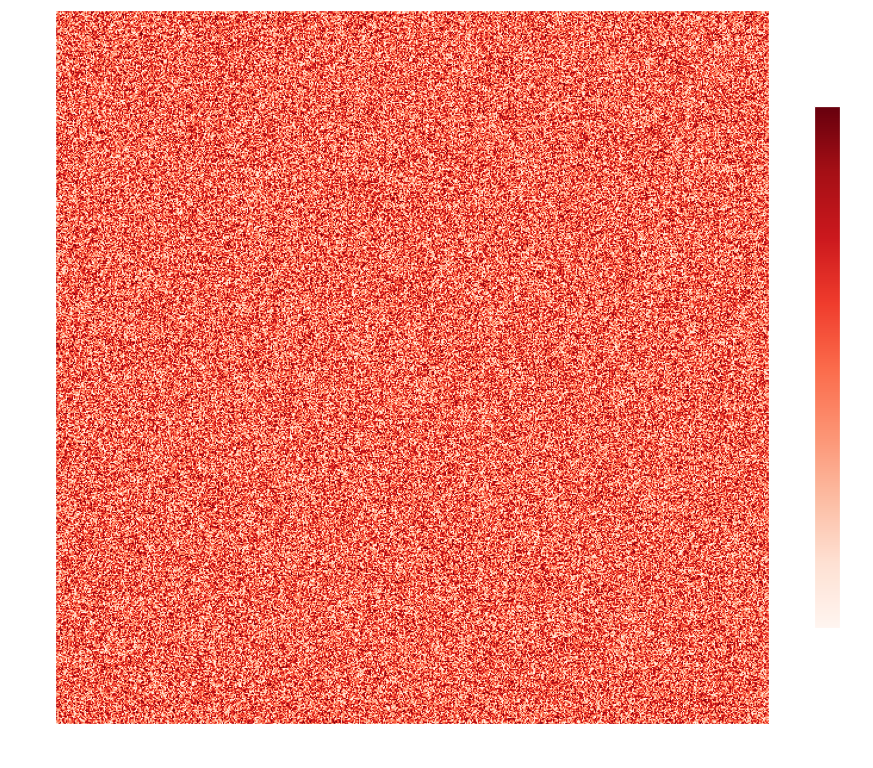

In [2]:
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch
from torch import nn as tchnet
import time as tm


attention_weights = tch.rand((600, 600)).reshape((1, 1, 600, 600))
tchx.show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


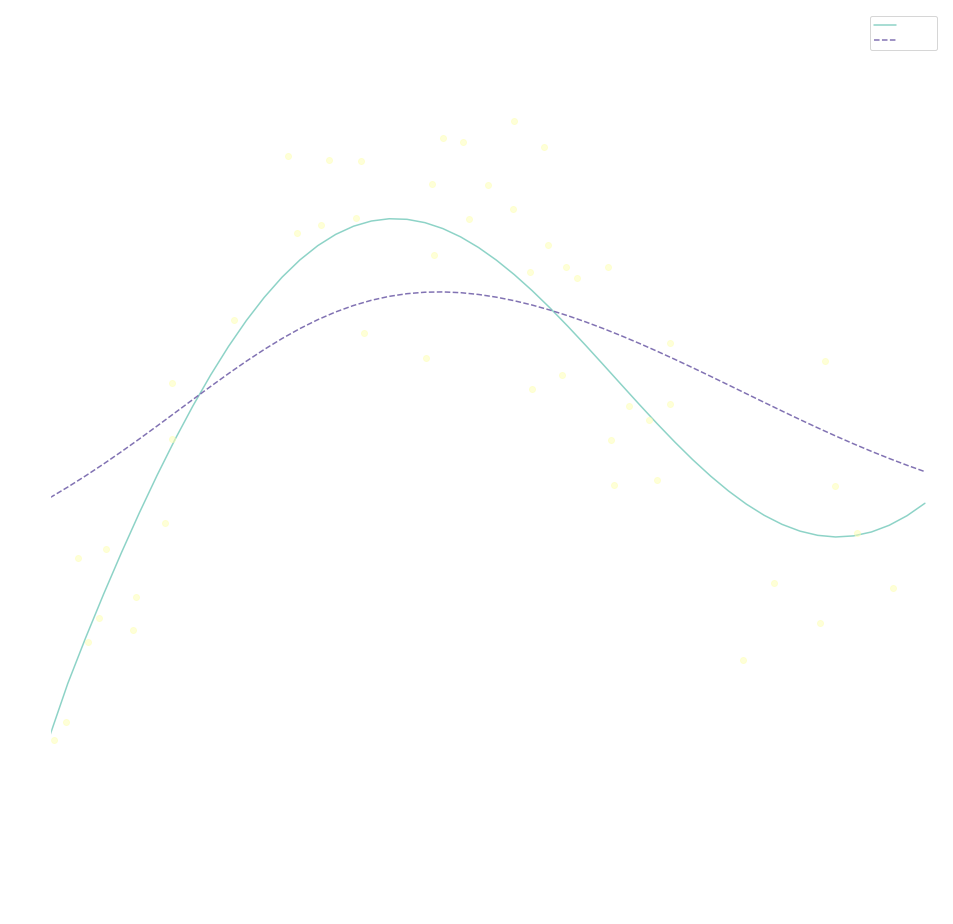

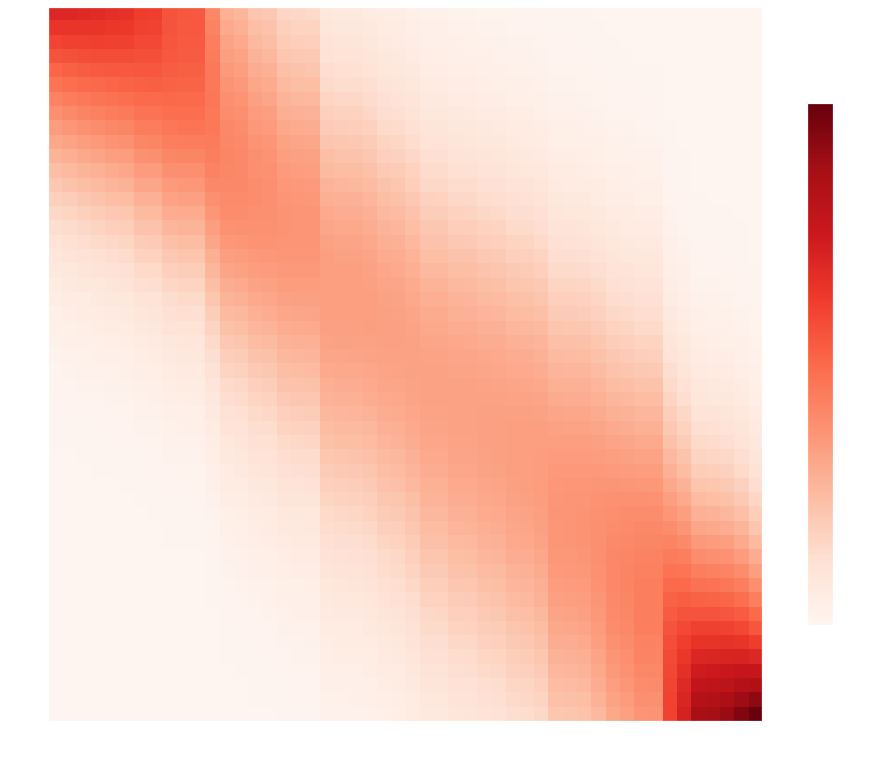

In [11]:
# Chapter 10
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch
from torch import nn as tchnet
import torch.nn.functional as functional
import time as tm


n_train = 50
x_train, _ = tch.sort(tch.rand(n_train) * 5)
def f(x):
    return 2 * tch.sin(x) + x ** 0.8

y_train = f(x_train) + tch.normal(0.0, 0.5, (n_train,))
x_test = tch.arange(0, 5, 0.1)
y_truth = f(x_test)
n_test = len(x_test)

def plot_kernel_reg(y_hat):
    fig, axes = tchx.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
              xlim=[0, 5], ylim=[-1, 5])
    axes.plot(x_train, y_train, 'o', alpha=0.5)

x_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
attention_weights = functional.softmax(-(x_repeat - x_train) ** 2 / 2, dim=1)
y_hat = tch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

tchx.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                   xlabel='Sorted training inputs', ylabel='Sorted testing inputs')

In [20]:
# Chapter 10
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch
from torch import nn as tchnet
import torch.nn.functional as functional
import time as tm


weights = tch.ones((2, 10)) * 0.1
values = tch.arange(20.0).reshape((2, 10))
print(weights.unsqueeze(1).shape)
print(values.unsqueeze(-1).shape)
print(tch.bmm(weights.unsqueeze(1), values.unsqueeze(-1)).shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
torch.Size([2, 1, 10])
torch.Size([2, 10, 1])
torch.Size([2, 1, 1])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
tensor([[[0.1879, 0.1226],
         [0.8182, 0.8914],
         [0.7984, 0.1123],
         [0.7886, 0.4873],
         [0.5829, 0.7442],
         [0.1419, 0.8748],
         [0.2231, 0.9287],
         [0.8911, 0.5889],
         [0.3590, 0.4331],
         [0.2447, 0.2959]],

        [[0.6677, 0.2582],
         [0.1484, 0.3818],
         [0.4061, 0.7351],
         [0.3351, 0.1113],
         [0.8636, 0.9570],
         [0.2116, 0.0604],
         [0.3146, 0.2364],
         [0.4746, 0.5755],
         [0.3910, 0.9808],
         [0.9586, 0.7310]]])


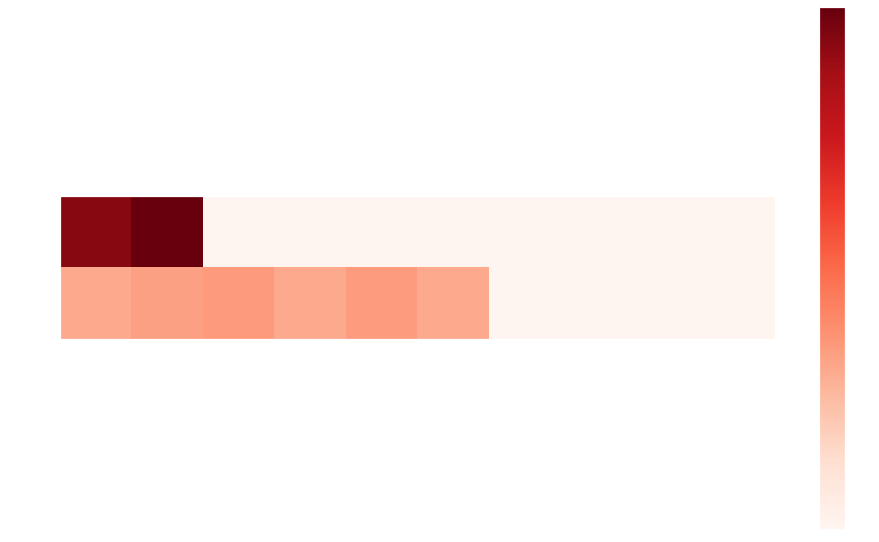

In [11]:
# Chapter 10
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch
from torch import nn as tchnet
import torch.nn.functional as functional
import time as tm


queries, keys = tch.normal(0, 1, (2, 1, 20)), tch.rand((2, 10, 2))
values = tch.arange(40, dtype=tch.float32).reshape((1, 10, 4)).repeat((2, 1, 1))

valid_lens = tch.tensor([2, 6])
attention = tchx.AdditiveAttention(key_size=2, query_size=20, hidden_size=8, dropout=0.1)
attention.eval()
attention(queries, keys, values, valid_lens)

tchx.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, -1)), xlabel='Keys', ylabel='Queries')

print(keys)

In [10]:
# Chapter 10
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch
from torch import nn as tchnet
import torch.nn.functional as functional
import time as tm


train_iter, src_vocab, tgt_vocab = tchx.load_data_nmt(batch_size=2, num_steps=8)
X, X_valid_len, Y, Y_valid_len = next(iter(train_iter))

decoder = tchx.Seq2SeqDecoder(vocab_size=10, embed_size=8, hidden_size=16, num_layers=2)
decoder.eval()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
tensor([[  7, 157,   4,   3,   1,   1,   1,   1],
        [ 16,  21,   4,   3,   1,   1,   1,   1]], dtype=torch.int32)
tensor([4, 4])
tensor([[ 6, 33, 17,  4,  3,  1,  1,  1],
        [41,  5,  3,  1,  1,  1,  1,  1]], dtype=torch.int32)
tensor([5, 3])
